<a href="https://colab.research.google.com/github/Ashreyagit/Ashreyagit.github.io/blob/master/GRIP_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP - The Sparks Foundation
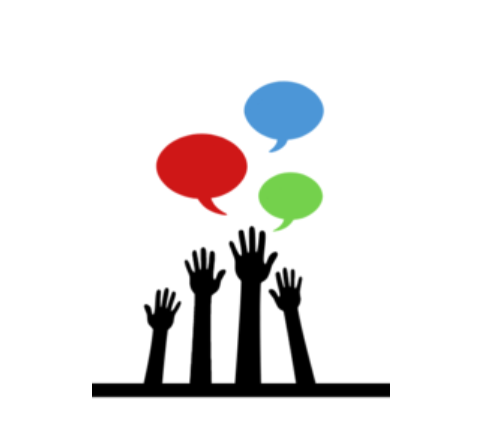

Internship on

DATA SCIENCE AND BUSINESS ANALYTICS

Author: **Shreya Abhyankar**



---





In [ ]:
pip install vaderSentiment

In [ ]:
import warnings
import re
import random
import pandas as pd
from pandas.plotting import scatter_matrix, autocorrelation_plot

import numpy as np
from numpy import newaxis

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import timeit
from datetime import datetime

import math
import missingno as msno

from keras.models import Sequential

from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler

#from fbprophet import Prophet

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA


from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier


print ('Libraries imported')

Libraries imported


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

print ('Support functions defined')

Support functions defined


In [ ]:
#Let's get the stock data

stock_data = pd.read_csv('https://raw.githubusercontent.com/Ashreyagit/BSESN.csv/main/%5EBSESN.csv.txt', index_col='Date',parse_dates=['Date'])
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-04,40293.851563,40483.210938,40186.289063,40301.960938,40301.960938,62600.0
2019-11-05,40445.671875,40466.550781,40053.550781,40248.230469,40248.230469,45400.0
2019-11-06,40311.851563,40606.910156,40037.531250,40469.781250,40469.781250,37700.0
2019-11-07,40625.640625,40688.269531,40421.070313,40653.738281,40653.738281,30200.0
2019-11-08,40630.558594,40749.328125,40263.941406,40323.609375,40323.609375,42600.0


In [ ]:
# FIgure out the dataframe columns
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-11-04 to 2020-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       249 non-null    float64
 1   High       249 non-null    float64
 2   Low        249 non-null    float64
 3   Close      249 non-null    float64
 4   Adj Close  249 non-null    float64
 5   Volume     249 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [ ]:
# Drop any null values in columns
stock_data = stock_data.dropna()

Plot the Data

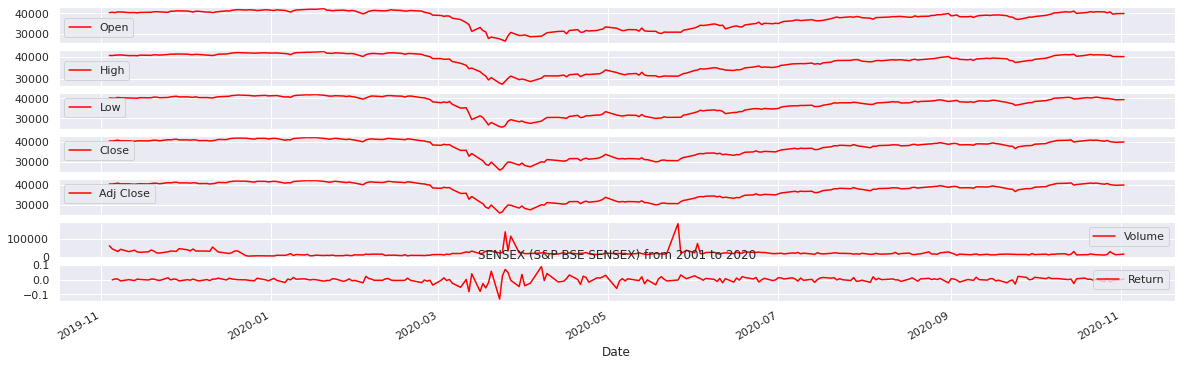

In [ ]:
stock_data['2001':'2020'].plot(subplots=True, figsize=(20,6),color='red')
plt.title('SENSEX (S&P BSE SENSEX) from 2001 to 2020')
plt.savefig('stocks.png')
plt.show(block=False)



Moving Average

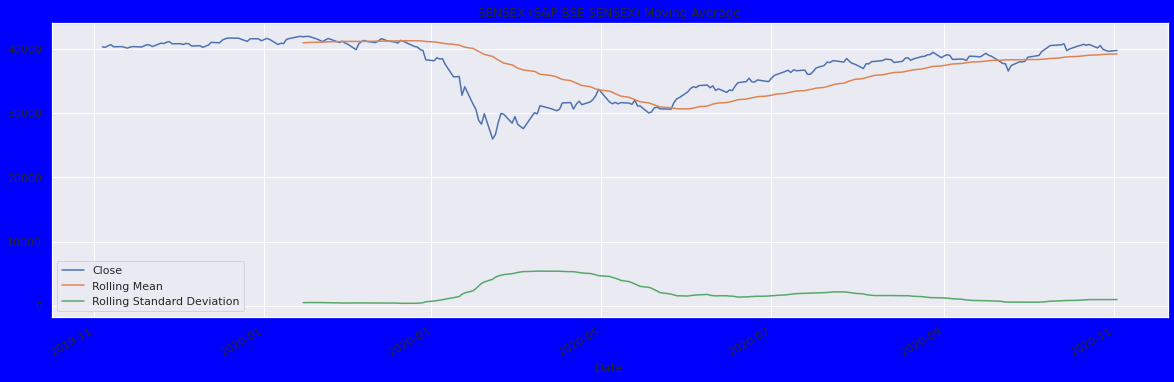

In [ ]:
close = stock_data['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20, 6),facecolor='blue')
plt.title('SENSEX (S&P BSE SENSEX) Moving Average')
stock_data['Close'].plot(label = 'Close')
ma.plot(label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()


Return


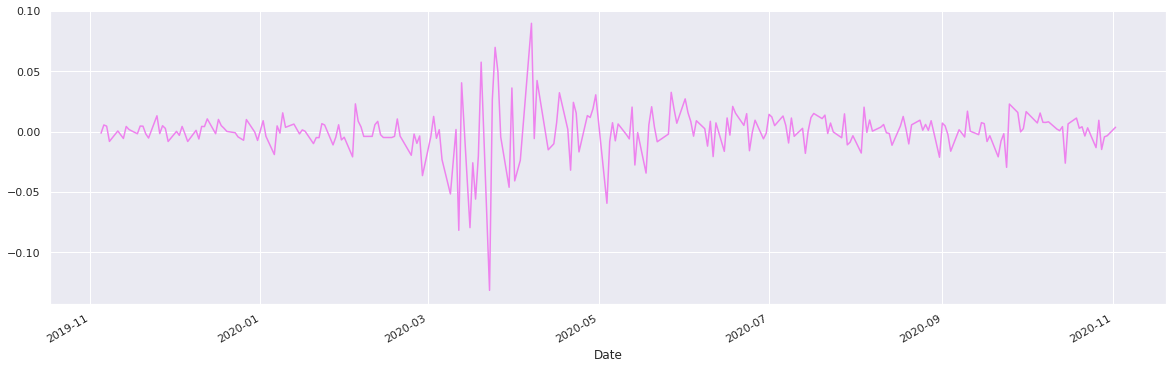

In [ ]:
stock_data['Return'] = stock_data['Adj Close'].pct_change()
stock_data['Return'].plot(figsize=(20,6),color='violet')


2. Textual Analysis

Lines below use to get Polarity and Subjectivity from dataset.

Load the dataset and adjust some features.


In [ ]:

#Load dataset into dataframe
news_data = pd.read_csv('https://raw.githubusercontent.com/Ashreyagit/news_headlines_India/main/india-news-headlines1.csv')

#Rename columns name
new_cols = ['Date','Category','News']
news_data.columns = new_cols

#Convert Date into datetime
news_data['Date'] = pd.to_datetime(news_data['Date'],format='%Y%m%d')
news_data = news_data[pd.notnull(news_data['Date'])]

#Remove Category
news_data.drop('Category', axis=1, inplace=True)
news_data


,Date,News
0,2020-10-22,win over cena satisfying but defeating underta...
1,2020-10-23,Status quo will not be disturbed at Ayodhya; s...
2,2020-10-23,Fissures in Hurriyat over Pak visit
3,2020-10-23,America's unwanted heading for India?
4,2020-10-23,For bigwigs; it is destination Goa
5,2020-10-23,Extra buses to clear tourist traffic
6,2020-10-23,Dilute the power of transfers; says Riberio
7,2020-10-23,Focus shifts to teaching of Hindi
8,2020-10-23,IT will become compulsory in schools
9,2020-10-23,Move to stop freedom fighters' pension flayed


In [ ]:
news_data['News'] = news_data.groupby(['Date']).transform(lambda x : ' '.join(x))
news_data = news_data.drop_duplicates()
news_data.reset_index(inplace = True, drop = True)

In [ ]:
news_data['Subjectivity'] = news_data['News'].apply(getSubjectivity)
news_data['Polarity'] = news_data['News'].apply(getPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(news_data['News'])):
    SIA = getSIA(news_data['News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [ ]:
news_data['Compound'] = compound
news_data['Negative'] = neg
news_data['Neutral'] = neu
news_data['Positive'] = pos

In [ ]:
news_data

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-10-22,win over cena satisfying but defeating underta...,0.633333,"(0.43333333333333335, 0.6333333333333333)",-0.0000,0.230,0.473,0.297
1,2020-10-23,Status quo will not be disturbed at Ayodhya; s...,0.282333,"(0.15133333333333332, 0.2823333333333333)",-0.9574,0.113,0.811,0.076
2,2020-10-26,Powerless north India gropes in the dark Think...,0.407692,"(0.08846153846153845, 0.40769230769230763)",0.5940,0.117,0.761,0.123
3,2020-10-27,The string that pulled Stephen Hawking to Indi...,0.446847,"(0.08796128734653325, 0.44684727840465543)",0.8738,0.098,0.800,0.102
4,2020-10-28,Light combat craft takes India into club class...,0.476612,"(0.2620243128964059, 0.47661205073995766)",0.9816,0.119,0.725,0.156
5,2020-10-29,Light combat craft takes India into club class...,0.439394,"(0.24848484848484853, 0.4393939393939394)",-0.4215,0.152,0.704,0.143
6,2020-10-30,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,"(-0.06070843570843573, 0.3653562653562654)",-0.9944,0.129,0.850,0.021
7,2020-11-02,Sangh Parivar; Babri panel up the ante Frontru...,0.488492,"(-0.09642857142857143, 0.48849206349206337)",0.6124,0.076,0.828,0.096


In [ ]:
 

news_data['Date'] = pd.to_datetime(news_data['Date'])
news_data = news_data[pd.notnull(news_data['Date'])]

In [ ]:
print(news_data.shape)
print(news_data.dtypes)

(8, 8)
Date            datetime64[ns]
News                    object
Subjectivity           float64
Polarity                object
Compound               float64
Negative               float64
Neutral                float64
Positive               float64
dtype: object


In [ ]:
news_data


,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-10-22,win over cena satisfying but defeating underta...,0.633333,"(0.43333333333333335, 0.6333333333333333)",-0.0000,0.230,0.473,0.297
1,2020-10-23,Status quo will not be disturbed at Ayodhya; s...,0.282333,"(0.15133333333333332, 0.2823333333333333)",-0.9574,0.113,0.811,0.076
2,2020-10-26,Powerless north India gropes in the dark Think...,0.407692,"(0.08846153846153845, 0.40769230769230763)",0.5940,0.117,0.761,0.123
3,2020-10-27,The string that pulled Stephen Hawking to Indi...,0.446847,"(0.08796128734653325, 0.44684727840465543)",0.8738,0.098,0.800,0.102
4,2020-10-28,Light combat craft takes India into club class...,0.476612,"(0.2620243128964059, 0.47661205073995766)",0.9816,0.119,0.725,0.156
5,2020-10-29,Light combat craft takes India into club class...,0.439394,"(0.24848484848484853, 0.4393939393939394)",-0.4215,0.152,0.704,0.143
6,2020-10-30,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,"(-0.06070843570843573, 0.3653562653562654)",-0.9944,0.129,0.850,0.021
7,2020-11-02,Sangh Parivar; Babri panel up the ante Frontru...,0.488492,"(-0.09642857142857143, 0.48849206349206337)",0.6124,0.076,0.828,0.096


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


print(stock_data)


                    Open          High           Low         Close  \
Date                                                                 
2019-11-04  40293.851563  40483.210938  40186.289063  40301.960938   
2019-11-05  40445.671875  40466.550781  40053.550781  40248.230469   
2019-11-06  40311.851563  40606.910156  40037.531250  40469.781250   
2019-11-07  40625.640625  40688.269531  40421.070313  40653.738281   
2019-11-08  40630.558594  40749.328125  40263.941406  40323.609375   
2019-11-11  40316.500000  40417.441406  40150.968750  40345.078125   
2019-11-13  40346.429688  40447.171875  40061.230469  40116.058594   
2019-11-14  40178.929688  40348.609375  40026.988281  40286.480469   
2019-11-15  40408.199219  40650.058594  40308.089844  40356.691406   
2019-11-18  40431.078125  40542.398438  40221.968750  40284.191406   
2019-11-19  40455.359375  40544.128906  40290.210938  40469.699219   
2019-11-20  40729.800781  40816.378906  40575.960938  40651.640625   
2019-11-21  40737.30

In [ ]:
merged_data = news_data[['Date', 'Subjectivity', 'Polarity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on= 'Date', left_index=True)
merged_data.reset_index(inplace = True, drop = True)

In [ ]:
merged_data

,Date,Subjectivity,Polarity,Positive,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-10-22,0.633333,"(0.43333333333333335, 0.6333333333333333)",0.297,0.230,0.473,40531.308594,40721.570313,40309.050781,40558.488281,40558.488281,13900.0,-0.003656
1,2020-10-23,0.282333,"(0.15133333333333332, 0.2823333333333333)",0.076,0.113,0.811,40728.390625,40811.121094,40590.898438,40685.500000,40685.500000,12400.0,0.003132
2,2020-10-26,0.407692,"(0.08846153846153845, 0.40769230769230763)",0.123,0.117,0.761,40649.761719,40724.398438,39948.289063,40145.500000,40145.500000,10100.0,-0.013273
3,2020-10-27,0.446847,"(0.08796128734653325, 0.44684727840465543)",0.102,0.098,0.800,40199.078125,40555.601563,39978.390625,40522.101563,40522.101563,13900.0,0.009381
4,2020-10-28,0.476612,"(0.2620243128964059, 0.47661205073995766)",0.156,0.119,0.725,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0,-0.014798
5,2020-10-29,0.439394,"(0.24848484848484853, 0.4393939393939394)",0.143,0.152,0.704,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0,-0.004324
6,2020-10-30,0.365356,"(-0.06070843570843573, 0.3653562653562654)",0.021,0.129,0.850,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0,-0.003416
7,2020-11-02,0.488492,"(-0.09642857142857143, 0.48849206349206337)",0.096,0.076,0.828,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0,0.003623


In [ ]:
print(merged_data.shape)
merged_data.tail()

(8, 13)


,Date,Subjectivity,Polarity,Positive,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Return
3,2020-10-27,0.446847,"(0.08796128734653325, 0.44684727840465543)",0.102,0.098,0.800,40199.078125,40555.601563,39978.390625,40522.101563,40522.101563,13900.0,0.009381
4,2020-10-28,0.476612,"(0.2620243128964059, 0.47661205073995766)",0.156,0.119,0.725,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0,-0.014798
5,2020-10-29,0.439394,"(0.24848484848484853, 0.4393939393939394)",0.143,0.152,0.704,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0,-0.004324
6,2020-10-30,0.365356,"(-0.06070843570843573, 0.3653562653562654)",0.021,0.129,0.850,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0,-0.003416
7,2020-11-02,0.488492,"(-0.09642857142857143, 0.48849206349206337)",0.096,0.076,0.828,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0,0.003623


In [ ]:
label = []
for row in range(len(merged_data)):
    if merged_data['Adj Close'].values[row] < merged_data['Open'].values[row]:
        #print('0')
        label.append(0)
    else:
        #print('1')
        label.append(1)

merged_data['Label'] = label

In [ ]:
merged_data

,Date,Subjectivity,Polarity,Positive,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Return,Label
0,2020-10-22,0.633333,"(0.43333333333333335, 0.6333333333333333)",0.297,0.230,0.473,40531.308594,40721.570313,40309.050781,40558.488281,40558.488281,13900.0,-0.003656,1
1,2020-10-23,0.282333,"(0.15133333333333332, 0.2823333333333333)",0.076,0.113,0.811,40728.390625,40811.121094,40590.898438,40685.500000,40685.500000,12400.0,0.003132,0
2,2020-10-26,0.407692,"(0.08846153846153845, 0.40769230769230763)",0.123,0.117,0.761,40649.761719,40724.398438,39948.289063,40145.500000,40145.500000,10100.0,-0.013273,0
3,2020-10-27,0.446847,"(0.08796128734653325, 0.44684727840465543)",0.102,0.098,0.800,40199.078125,40555.601563,39978.390625,40522.101563,40522.101563,13900.0,0.009381,1
4,2020-10-28,0.476612,"(0.2620243128964059, 0.47661205073995766)",0.156,0.119,0.725,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0,-0.014798,0
5,2020-10-29,0.439394,"(0.24848484848484853, 0.4393939393939394)",0.143,0.152,0.704,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0,-0.004324,1
6,2020-10-30,0.365356,"(-0.06070843570843573, 0.3653562653562654)",0.021,0.129,0.850,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0,-0.003416,0
7,2020-11-02,0.488492,"(-0.09642857142857143, 0.48849206349206337)",0.096,0.076,0.828,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0,0.003623,0


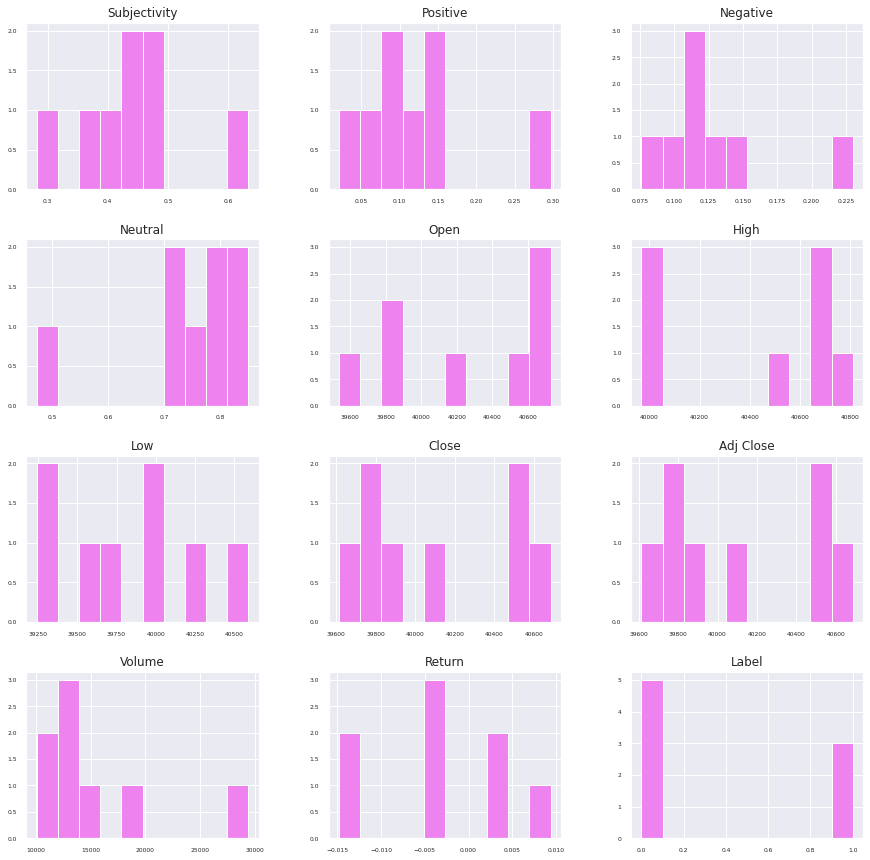

In [ ]:
sns.set()
merged_data.hist(sharex = False, sharey = False, xlabelsize = 6, ylabelsize = 6, figsize=(15, 15),color='violet')
pyplot.show()

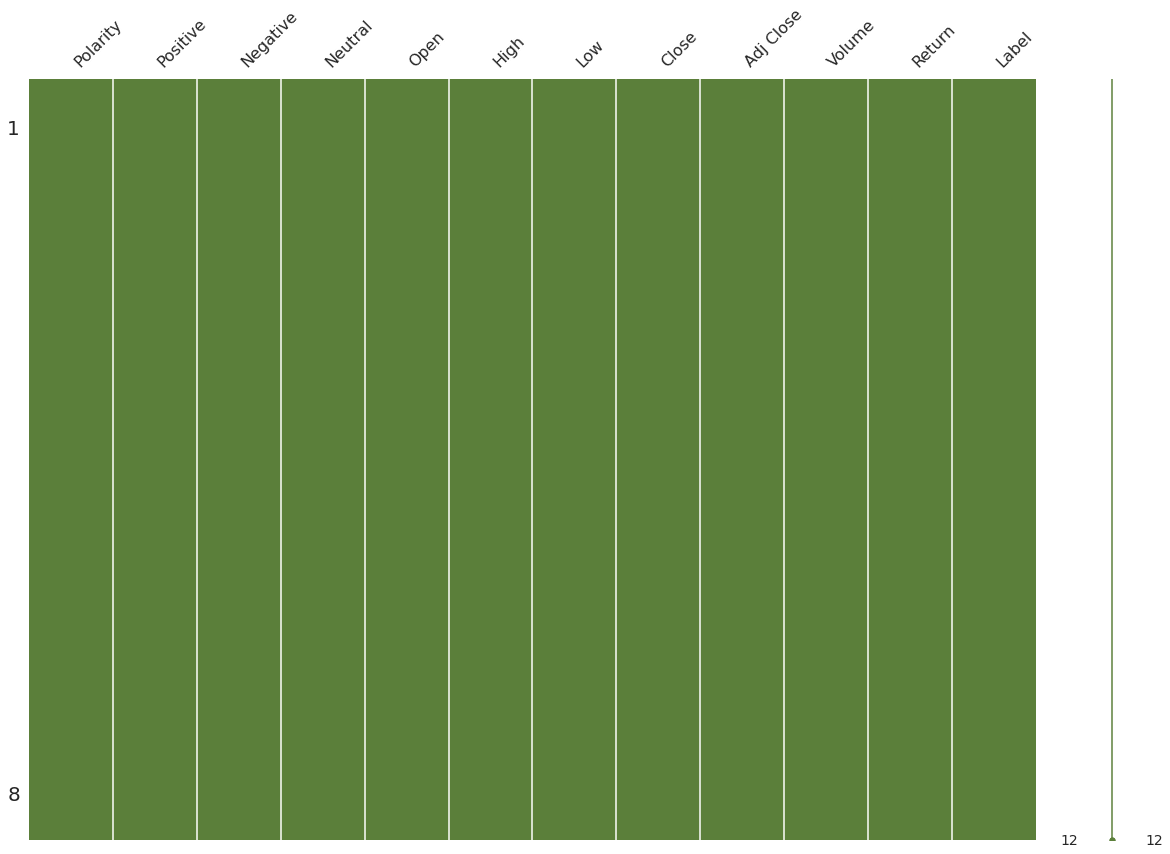

In [ ]:
merged_data_copy = merged_data
merged_data_copy = merged_data_copy.replace(-1, np.NaN)

# Nullity or missing values by columns
msno.matrix(df=merged_data.iloc[:,2:39], figsize=(20, 14), color=(0.36, 0.5, 0.23))

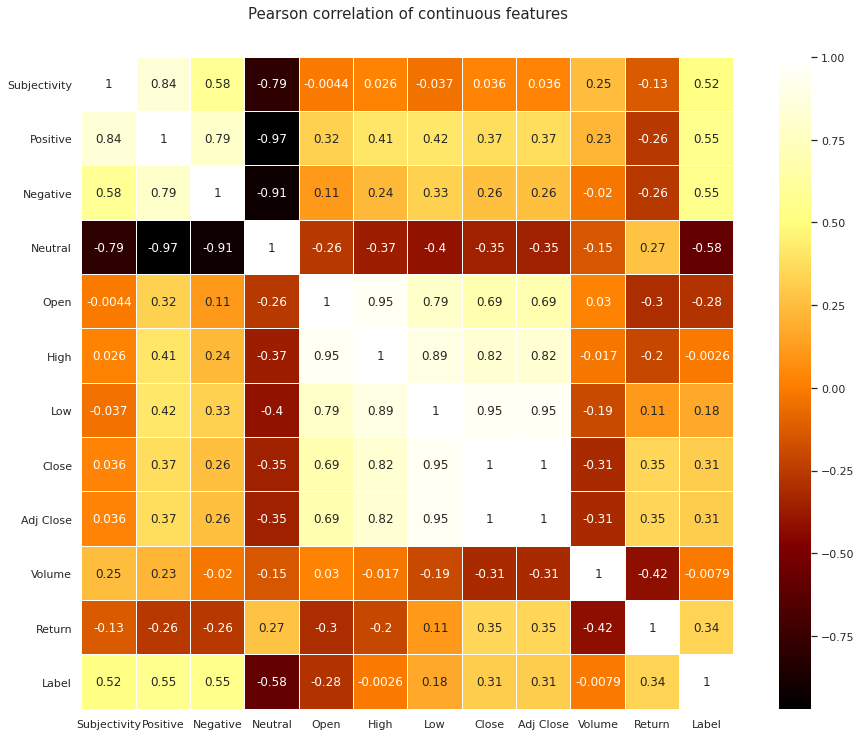

In [ ]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_data.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

In [ ]:
print(merged_data.count())

Date            8
Subjectivity    8
Polarity        8
Positive        8
Negative        8
Neutral         8
Open            8
High            8
Low             8
Close           8
Adj Close       8
Volume          8
Return          8
Label           8
dtype: int64


In [ ]:
nan_list = ['Return']
for col in nan_list:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mean())

In [ ]:
print(merged_data.count())

Date            8
Subjectivity    8
Polarity        8
Positive        8
Negative        8
Neutral         8
Open            8
High            8
Low             8
Close           8
Adj Close       8
Volume          8
Return          8
Label           8
dtype: int64


In [ ]:
# Print the datatypes and count of the dataframe
print(merged_data.dtypes)
print(merged_data.count())

# Change the NaN values to the mean value of that column
nan_list = ['Subjectivity','Polarity','Positive','Negative','Neutral','Open','High','Low','Adj Close','Volume','Return','Label']


# Recheck the count
print(merged_data.count())

# Separate the dataframe for input(X) and output variables(y)
X = merged_data.loc[:,'Polarity':'Return']
y = merged_data.loc[:,'Label']

# Set the validation size, i.e the test set to 20%
validation_size = 0.20

# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)

X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y.loc[0:train_size], y.loc[train_size: len(X.index)]

print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))


scoring = 'accuracy'

# Append the models to the models list
models = []
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

Date            datetime64[ns]
Subjectivity           float64
Polarity                object
Positive               float64
Negative               float64
Neutral                float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Return                 float64
Label                    int64
dtype: object
Date            8
Subjectivity    8
Polarity        8
Positive        8
Negative        8
Neutral         8
Open            8
High            8
Low             8
Close           8
Adj Close       8
Volume          8
Return          8
Label           8
dtype: int64
Date            8
Subjectivity    8
Polarity        8
Positive        8
Negative        8
Neutral         8
Open            8
High            8
Low             8
Close           8
Adj Close       8
Volume          8
Return          8
Label           8
dtype: int64
8
5
Observations: 8
X 